<span style="color:black;font-weight:700;font-size:32px"> 
               В один клик
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание проекта
</span>

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<span style="color:black;font-weight:700;font-size:22px"> 
              Необходимо:
</span>
Подход к решению задачи:

1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

В ходе работы нужно:
1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

<span style="color:black;font-weight:700;font-size:22px"> 
              План работы
 </span>
 
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Объединение датасетов

5) Корреляционный анализ

6) Построение пайплайнов моделей машинного обучения (KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC().)

7) Анализ важности признаков. 

8) Сегментация покупателей.

9) Общий вывод

In [1]:
!pip install phik -q
!pip install mlxtend -q
!pip install shap -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler, 
                                   MinMaxScaler, MaxAbsScaler, OrdinalEncoder,
                                  RobustScaler)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, r2_score, roc_curve,RocCurveDisplay)
from mlxtend.plotting import plot_decision_regions 
import shap

import time


# Загрузка данных


In [3]:
start_time = time.time()
start_time

1699801416.4650972

In [4]:
try:
    market_file_df = pd.read_csv('/datasets/market_file.csv', index_col='id')
except:
    market_file_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', index_col='id')

In [5]:
try:
    market_money_df = pd.read_csv('/datasets/market_money.csv', index_col='id')
except:
    market_money_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', index_col='id')

In [6]:
try:
    market_time_df = pd.read_csv('/datasets/market_time.csv', index_col='id')
except:
    market_time_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', index_col='id')

In [7]:
try:
    money_df = pd.read_csv('/datasets/money.csv',sep=';', index_col='id')
except:
    money_df = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv',sep=';', index_col='id')

In [8]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_money_df.head()

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [10]:
market_time_df.head()

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдцщий_месяц,13
215349,текущий_месяц,10
215349,предыдцщий_месяц,12
215350,текущий_месяц,13


In [11]:
money_df.head()

,Прибыль
id,
215348,"0,98"
215349,"4,16"
215350,"3,13"
215351,"4,87"
215352,"4,21"


In [12]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [13]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Период   3900 non-null   object 
 1   Выручка  3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [14]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Период  2600 non-null   object
 1   минут   2600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [15]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Прибыль  1300 non-null   object
dtypes: object(1)
memory usage: 20.3+ KB


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Датасет market_file_df содержит в себе 1300 записей и 12 признаков. Датасет не содержит пропусков данных.

Датасет market_money_df содержит в себе 3900 записей и 2 признака. Датасет не содержит пропусков данных.

Датасет market_time_df содержит 2600 записей и 2 признака. Датасет не содержит пропусков данных.

Датасет money_df содержит 1300 записей и 2 признака. Датасет не содержит пропусков данных.


# Предобработка данных

На этапе предобработки данных, обработаем пропуски и дубликаты в данных, приведем к единому формату записи в столцах, а также пребразуем типы данных

## Обработка датасета market_file_df

In [16]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [17]:
market_file_df.head(10)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3


In [18]:
market_file_df['Тип сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

In [19]:
market_file_df['Тип сервиса'] = market_file_df['Тип сервиса'].replace('стандартт', 'стандарт')

In [20]:
market_file_df['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

In [21]:
market_file_df['Популярная_категория'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

Обработали неявные дубликаты в категориальных признаках

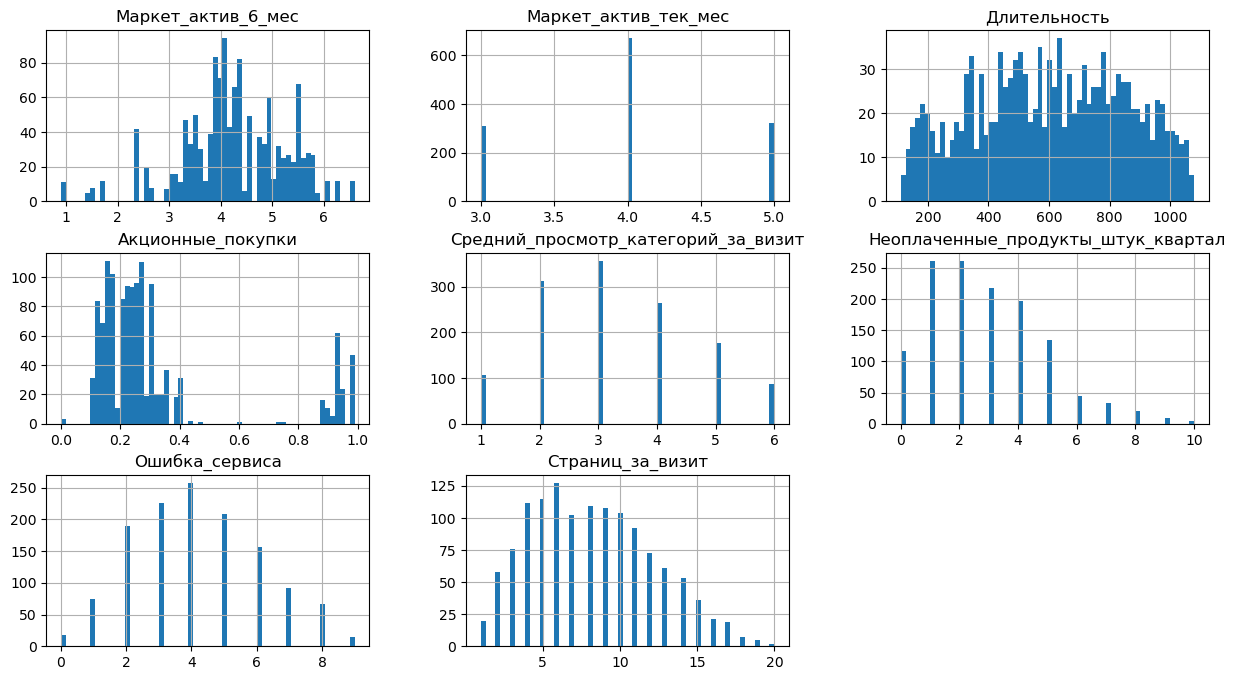

In [22]:
market_file_df.hist(bins=60, figsize=(15,8));

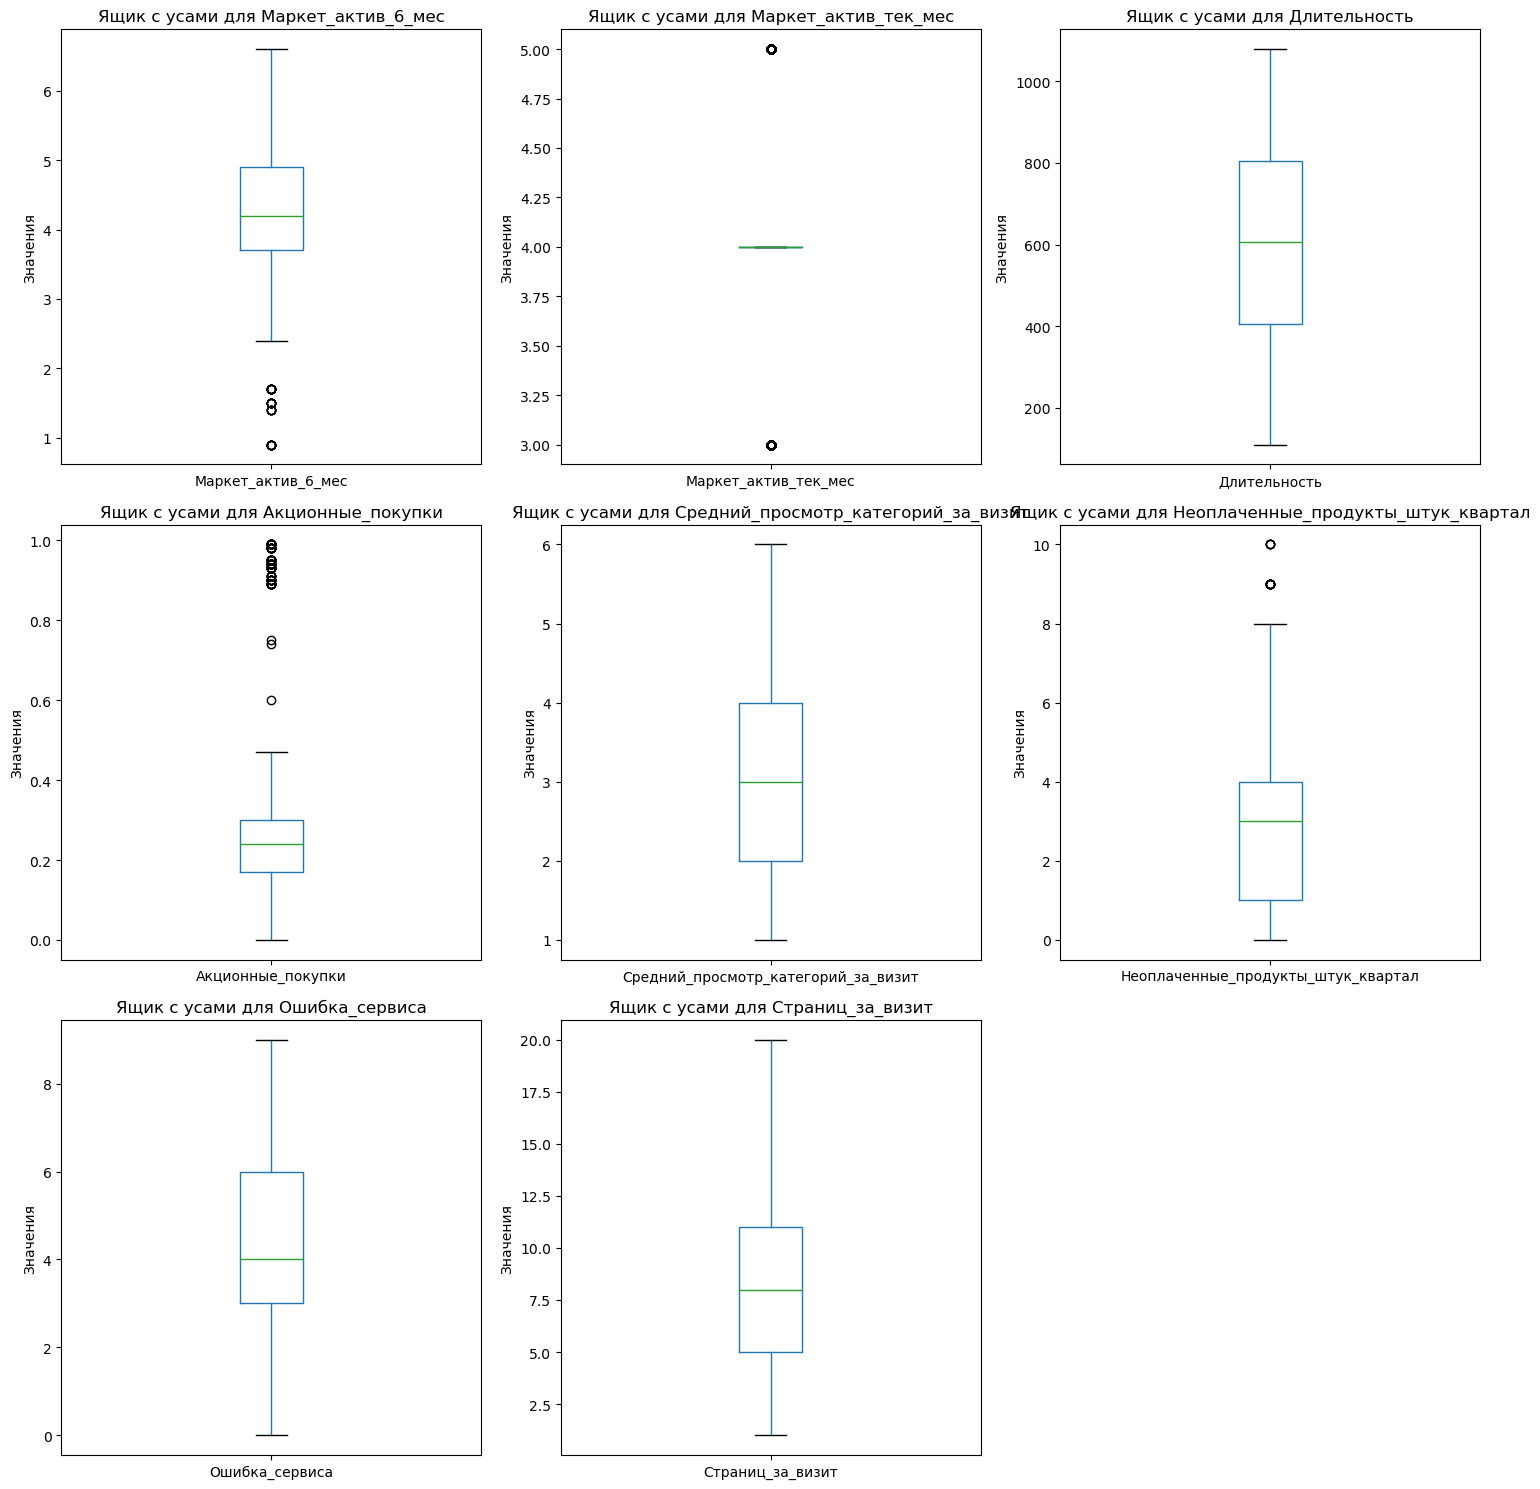

In [23]:
numeric_columns = market_file_df.select_dtypes(include=['number'])
columns = numeric_columns.columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    numeric_columns.boxplot(column=column, ax=ax)
    ax.set_title(f'Ящик с усами для {column}')
    ax.set_ylabel('Значения')
    ax.grid(False)

for i in range(len(columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Выбросов в данных не наблюдается


## Обработка market_money_df 

In [24]:
market_money_df.head()

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [25]:
market_money_df['Период'].value_counts()

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: Период, dtype: int64

array([[<AxesSubplot: title={'center': 'Выручка'}>]], dtype=object)

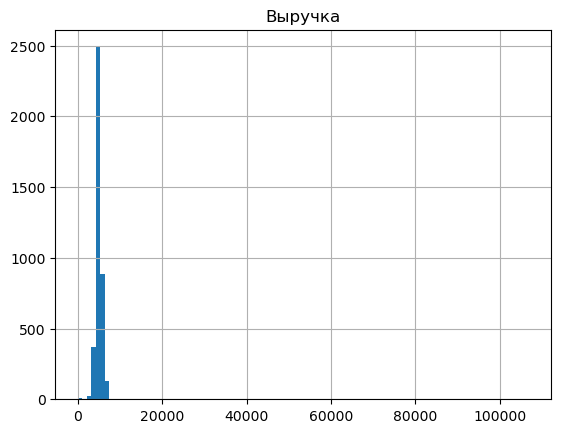

In [26]:
market_money_df.hist(bins=100)

<AxesSubplot: ylabel='Выручка'>

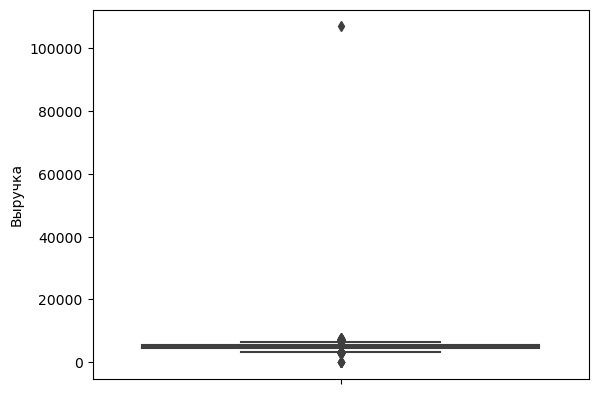

In [27]:
sns.boxplot(y=market_money_df['Выручка'],data=market_money_df,fliersize=5)

Определим индекс выброса и удалим во всех датасетах, пользователя с этим индексом


In [28]:
index_to_delete = market_money_df[market_money_df['Выручка'] > 10000].index
market_money_df = market_money_df.drop(index=index_to_delete)
market_file_df = market_file_df.drop(index=index_to_delete)
market_time_df = market_time_df.drop(index=index_to_delete)
money_df = money_df.drop(index=index_to_delete)

<AxesSubplot: ylabel='Выручка'>

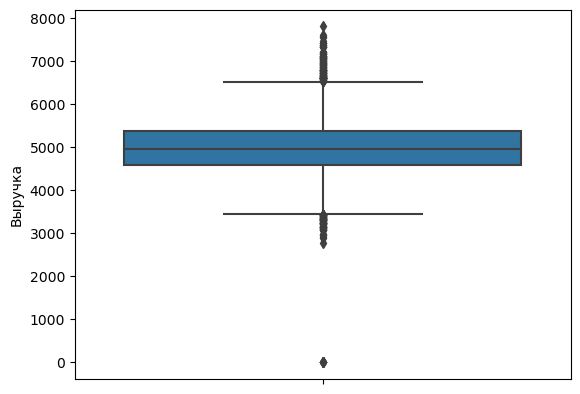

In [29]:
sns.boxplot(y=market_money_df['Выручка'],data=market_money_df,fliersize=5)

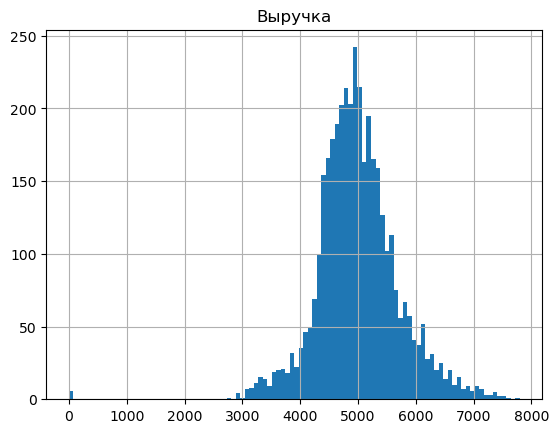

In [30]:
market_money_df.hist(bins=100);

## Обработка market_time_df

In [31]:
market_time_df.head()

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдцщий_месяц,13
215349,текущий_месяц,10
215349,предыдцщий_месяц,12
215350,текущий_месяц,13


In [32]:
market_time_df['Период'].value_counts()

текущий_месяц       1299
предыдцщий_месяц    1299
Name: Период, dtype: int64

In [33]:
market_time_df['Период'] = market_time_df['Период'].replace('предыдцщий_месяц','предыдущий_месяц')

array([[<AxesSubplot: title={'center': 'минут'}>]], dtype=object)

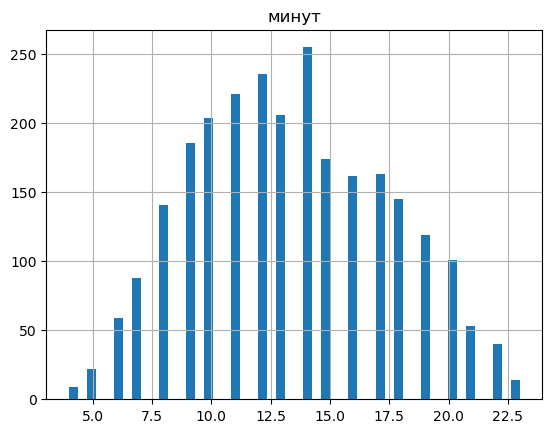

In [34]:
market_time_df.hist(bins=50)

## Обработка money_df

In [35]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Прибыль  1299 non-null   object
dtypes: object(1)
memory usage: 20.3+ KB


In [36]:
money_df.head()

,Прибыль
id,
215348,"0,98"
215349,"4,16"
215350,"3,13"
215351,"4,87"
215352,"4,21"


In [37]:
money_df['Прибыль'] = (money_df['Прибыль'].apply(lambda x: float(x.replace(',','.'))) * 1000).astype('int')


Очевидно, что прибыль указана в тысячах, преобразуем этот столбец и умножим его на 1000, чтобы он показывал прибыль в рублях. 

In [38]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Прибыль  1299 non-null   int32
dtypes: int32(1)
memory usage: 15.2 KB


In [39]:
money_df.head()

,Прибыль
id,
215348,980
215349,4160
215350,3130
215351,4870
215352,4210


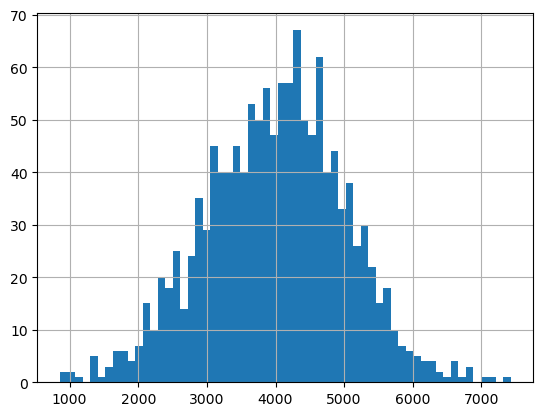

In [40]:
money_df['Прибыль'].hist(bins=60);

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

В ходе предобработки данных, были обработаны датасеты. В них были обработаны неявные дубликаты в строковых столбцах, удалены выбросы и соответствующие индексы для других датасетов, также где это необходимо были преобразованы типы данных

# Исследовательский анализ данных

## Анализ market_file_df

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

In [41]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [42]:
market_file_df.describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,4.255735,4.011547,601.871440,0.319330,3.270208,2.840647,4.185527,8.177829
std,1.012725,0.697136,249.950617,0.249345,1.355852,1.972073,1.956044,3.979524
min,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


In [43]:
market_file_df.describe(include='object')

,Покупательская активность,Тип сервиса,Разрешить сообщать,Популярная_категория
count,1299,1299,1299,1299
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


In [44]:
def plot_pie_for_feature(df, column):
    fig, ax = plt.subplots(figsize=(12,7))
    colors=['lightgreen', 'yellow', 'red', 'skyblue', 'orange', 'blue']
    column_values_counts = df[column].value_counts()
    column_values_counts.plot(kind='pie', ax = ax, colors= colors, autopct='%1.1f%%')
    plt.title(column)    

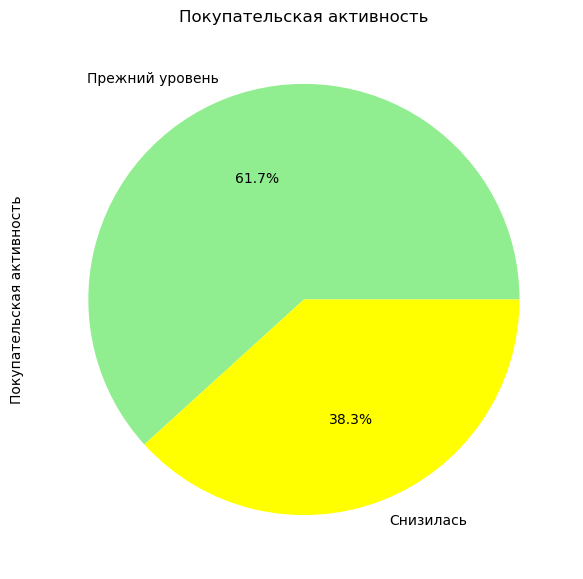

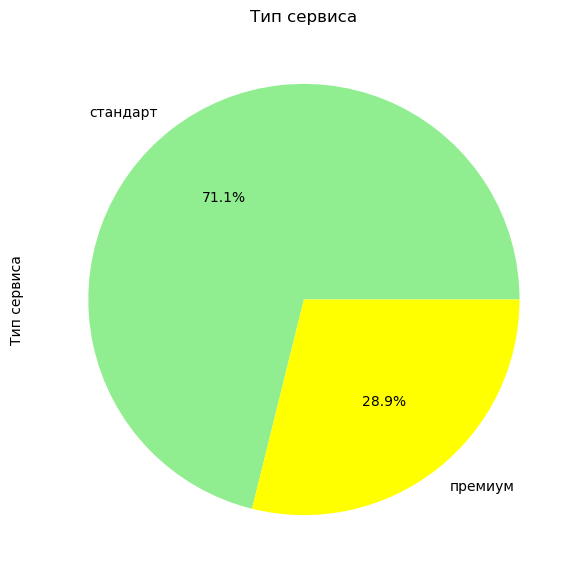

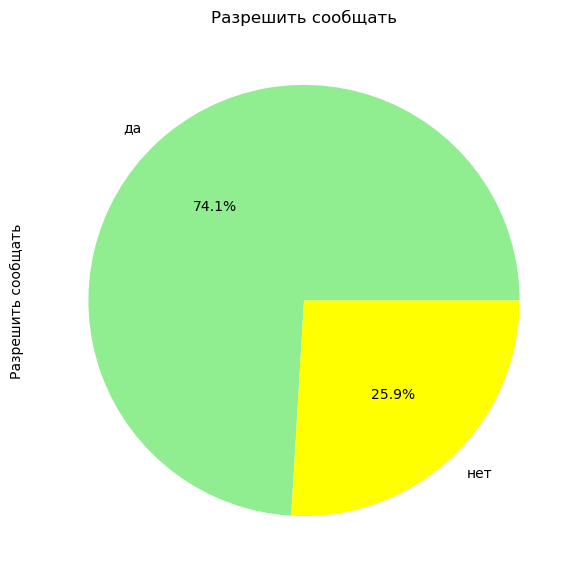

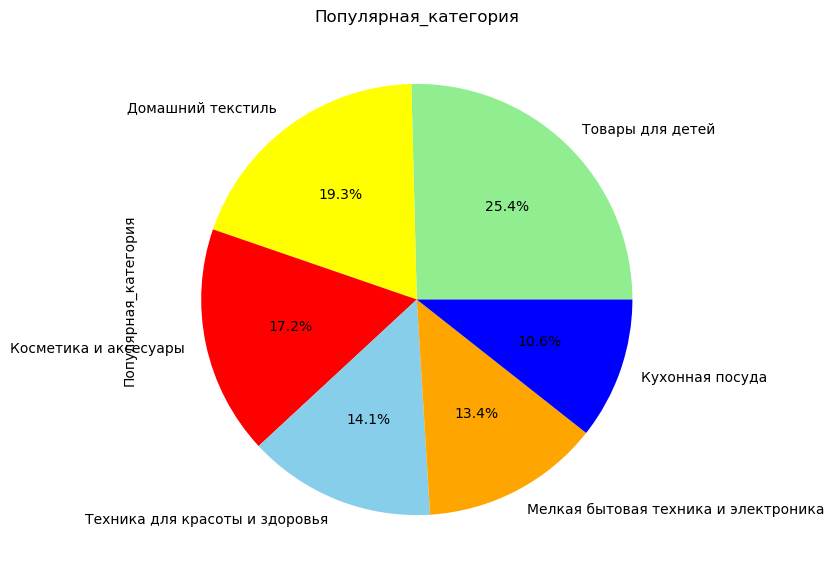

In [45]:
for col in ['Покупательская активность', "Тип сервиса", "Разрешить сообщать" ,"Популярная_категория"]:
    plot_pie_for_feature(market_file_df, col)

In [46]:
market_file_df.pivot_table(index=['Покупательская активность', 'Тип сервиса'],
                          values=['Разрешить сообщать', 'Маркет_актив_6_мес','Маркет_актив_тек_мес',
                                  'Страниц_за_визит', 'Ошибка_сервиса', 'Акционные_покупки'],
                          aggfunc={'Разрешить сообщать': 'count', 'Маркет_актив_6_мес': np.mean,
                                   'Маркет_актив_тек_мес': np.mean, 'Страниц_за_визит': np.mean,
                                   'Ошибка_сервиса': np.mean, 'Акционные_покупки': np.mean})\
                                  .rename(columns={'Разрешить сообщать':'Пок. актив-ть\ Тип сер-са кол-во'})

Акционные_покупки  Маркет_актив_6_мес  \
Покупательская активность Тип сервиса                                          
Прежний уровень           премиум               0.229320            4.520874   
                          стандарт              0.241493            4.587081   
Снизилась                 премиум               0.462130            3.636686   
                          стандарт              0.443720            3.806098   

                                       Маркет_актив_тек_мес  Ошибка_сервиса  \
Покупательская активность Тип сервиса                                         
Прежний уровень           премиум                  3.898058        4.305825   
                          стандарт                 4.050336        4.345638   
Снизилась                 премиум                  3.976331        4.213018   
                          стандарт                 4.030488        3.804878   

                                       Пок. актив-ть\ Тип сер-са кол-во  \
Покупательская активность Тип сервиса                                     
Прежний уровень           премиум                                   206   
                          стандарт                                  596   
Снизилась                 премиум                                   169   
                          стандарт                                  328   

                                       Страниц_за_визит  
Покупательская активность Тип сервиса                    
Прежний уровень           премиум             10.558252  
                          стандарт             9.533557  
Снизилась                 премиум              5.573964  
                          стандарт             5.560976

Как можно заметить из сводной таблицы для тех клиентов, чей уровень покупательской активности остался на прежнем уровне маркетинговая активность для них была выше, чем для тех, чья активность снизилась(соответственно, можно сказать, что маркетинговая активность  приносит свою пользу, и клиенты чаще оставляют покупательскую активность на прежнем уровне).

Также можно отметить, тот факт ,что компания в текущем месяцк проводит активную маркетинговую компанию для пользователей с подпиской типа "стандарт".

Также можно отметить, что покупатели чья активность осталась на прежнем уровне, в среднем посещают больше страниц за визит.

Также можно отметить, что ошибки сервиса не почти не влияют на снижение покупательской активности так как среднее количество ошибок почти одинаковое.

Исходя из таблицы можно заметить, что не смотря на высокую долю акционных покупок за последний 6 месяцев, покупательная активность таких клиентов снижается, это может говорить о том, что 1) компании нужно пересмотреть акционную политику, или 2) подбирать акции исходя из предпочтений клиента. 


!!! Также важно отметить, что для целевого признака наблюдается дисбаланс классов, будем учитывать это при построении моделей машинного обучения.

## Анализ market_money_df

In [47]:
market_money_df.head(10)

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6
215349,предыдущий_месяц,5216.0
215350,препредыдущий_месяц,4826.0
215350,текущий_месяц,5058.4
215350,предыдущий_месяц,5457.5


In [48]:
market_money_df.pivot_table(index='Период',
                           values='Выручка',
                           aggfunc=np.sum)

,Выручка
Период,
предыдущий_месяц,6411919.5
препредыдущий_месяц,6267718.0
текущий_месяц,6802586.9


In [49]:
non_null_revenue_id = market_money_df.groupby('id').filter(lambda x: (x['Выручка'] != 0.0).all())
non_null_revenue_id_list=non_null_revenue_id.index.unique().to_list()


В non_null_revenue_id содержится список клиентов с покупательской активностью три месяца, т.е те , которые что-то покупали в этот период.

In [50]:
market_money_df[market_money_df['Выручка'] == 0]

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,предыдущий_месяц,0.0
215357,препредыдущий_месяц,0.0
215357,предыдущий_месяц,0.0
215359,предыдущий_месяц,0.0
215359,препредыдущий_месяц,0.0


Клиенты с id = 215348, 215357, 215359 совершали покупки только в текущем месяце, по условиям проекта нам нужны клиенты с покупательской активностью не меньше трех месяцев, поэтому удалим этих клиентов



In [51]:
null_revenue_id = market_money_df[market_money_df['Выручка'] == 0].index
null_revenue_id = null_revenue_id.drop_duplicates().to_list()
null_revenue_id

[215348, 215357, 215359]

In [52]:
market_money_df = market_money_df.drop(index=null_revenue_id)
market_file_df = market_file_df.drop(index=null_revenue_id)
market_time_df = market_time_df.drop(index=null_revenue_id)
money_df = money_df.drop(index=null_revenue_id)

## Анализ market_time_df

In [53]:
market_time_df

,Период,минут
id,,
215349,текущий_месяц,10
215349,предыдущий_месяц,12
215350,текущий_месяц,13
215350,предыдущий_месяц,8
215351,текущий_месяц,13
...,...,...
216645,текущий_месяц,18
216646,предыдущий_месяц,18
216646,текущий_месяц,7


In [54]:
market_time_df.pivot_table(index='Период', values='минут', aggfunc=np.mean)

,минут
Период,
предыдущий_месяц,13.470679
текущий_месяц,13.210648


Среднее значение времени проведенного на сайте в текущем и предыдущем месяце примерно одинаковы


## Анализ money_df

In [55]:
money_df.head()

,Прибыль
id,
215349,4160
215350,3130
215351,4870
215352,4210
215353,3950


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Как можно заметить из сводной таблицы для тех клиентов, чей уровень покупательской активности остался на прежнем уровне маркетинговая активность для них была выше, чем для тех, чья активность снизилась(соответственно, можно сказать, что маркетинговая активность  приносит свою пользу, и клиенты чаще оставляют покупательскую активность на прежнем уровне).

Также можно отметить, тот факт ,что компания в текущем месяцк проводит активную маркетинговую компанию для пользователей с подпиской типа "стандарт".

Также можно отметить, что покупатели чья активность осталась на прежнем уровне, в среднем посещают больше страниц за визит.

Также можно отметить, что ошибки сервиса не почти не влияют на снижение покупательской активности так как среднее количество ошибок почти одинаковое.

Исходя из таблицы можно заметить, что не смотря на высокую долю акционных покупок за последний 6 месяцев, покупательная активность таких клиентов снижается, это может говорить о том, что 1) компании нужно пересмотреть акционную политику, или 2) подбирать акции исходя из предпочтений клиента. 

Клиенты с id = 215348, 215357, 215359 совершали покупки только в текущем месяце. Все остальные клиенты имели активность во все три месяца.
Среднее значение времени проведенного на сайте в текущем и предыдущем месяце примерно одинаковы

# Объединение датасетов

In [56]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [57]:
market_money_df.head()

,Период,Выручка
id,,
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6
215349,предыдущий_месяц,5216.0
215350,препредыдущий_месяц,4826.0
215350,текущий_месяц,5058.4


In [58]:
market_time_df.head()

,Период,минут
id,,
215349,текущий_месяц,10
215349,предыдущий_месяц,12
215350,текущий_месяц,13
215350,предыдущий_месяц,8
215351,текущий_месяц,13


In [59]:
full_df = market_file_df.copy()

Учитывая, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода. Для этого сформируем отдельные датасеты по выручке и времени, с разделением на периоды (препредыдущий_месяц, предыдущий_месяц, текущий_месяц)

In [60]:
prepred_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'препредыдущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_препред_месяц'})

pred_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'предыдущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_пред_месяц'})

tek_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'текущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_текущ_месяц'})

pred_time = pd.DataFrame(market_time_df[market_time_df['Период'] == 'предыдущий_месяц']['минут'])\
              .rename(columns={'минут': 'время_пред_месяц'})

tek_time = pd.DataFrame(market_time_df[market_time_df['Период'] == 'текущий_месяц']['минут'])\
              .rename(columns={'минут': 'время_текущ_месяц'})

In [61]:
full_df = full_df.join(prepred_rev, on='id').join(pred_rev, on='id').join(tek_rev, on='id')\
                 .join(pred_time, on='id').join(tek_time, on='id')


In [62]:
full_df.head(10)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_текущ_месяц,время_пред_месяц,время_текущ_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,4503.0,5685.0,5869.6,11,12
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3263.0,3772.6,12,10
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4146.5,4566.4,6,7
215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,4727.0,3488.0,4209.5,14,10


In [63]:
full_df.shape

(1296, 17)

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>
Объединили датасете market_file_df, market_money_df, market_time_df. В результате получили датасет с 1299 записями(одна запись была удалена на этапе обработки выбросов)

# Корреляционный анализ

Для анализа корреляции между признаками используем библиотеку phik 

In [64]:
phik_correlation = phik_matrix(full_df)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц', 'выручка_текущ_месяц', 'время_пред_месяц', 'время_текущ_месяц']


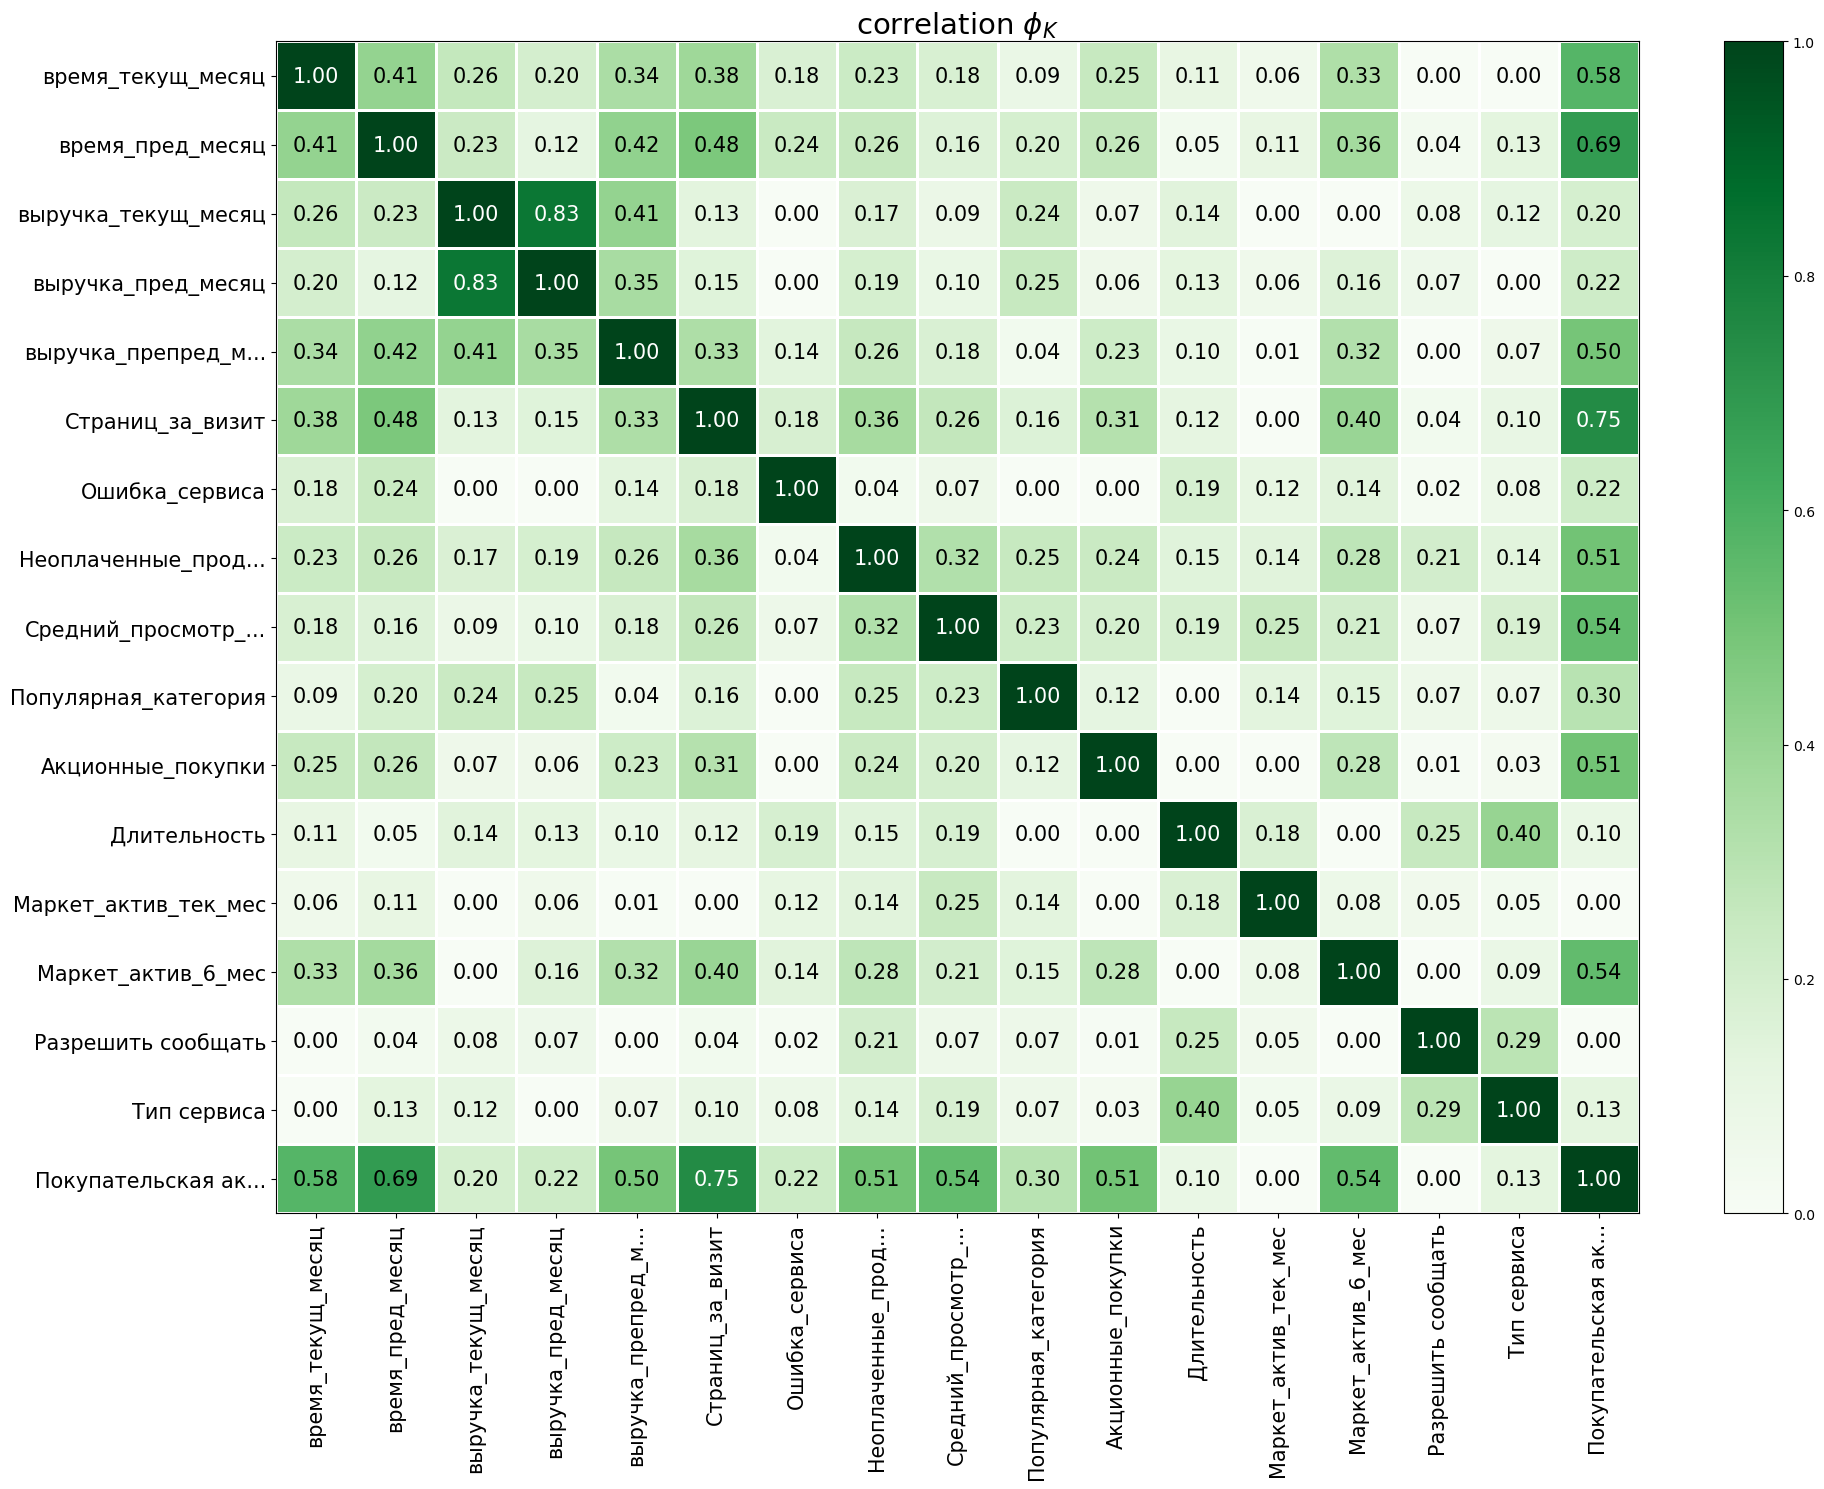

In [65]:
plot_correlation_matrix(
    phik_correlation.values,
    x_labels=phik_correlation.columns,
    y_labels=phik_correlation.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Явной мультиколлиниарности относительно целевого признака не наблюдается. Анализуруя таблицу корреляций можно отметить, что целевой признак не зависит от признаков "маркет_актив_тек_мес", "разрешить сообщать", и почти не зависит от параметра "длительность" (время прошедшее с момента регистрации). От этих признаков можно избавиться в дальнейшем анализе.


In [66]:
full_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_текущ_месяц,время_пред_месяц,время_текущ_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>


Явной мультиколлиниарности относительно целевого признака не наблюдается. Анализуруя таблицу корреляций можно отметить, что целевой признак не зависит от признаков "маркет_актив_тек_мес", "разрешить сообщать", и почти не зависит от параметра "длительность" (время прошедшее с момента регистрации). От этих признаков можно избавиться в дальнейшем анализе.

# Использование пайплайнов для построения моделей МО

Закодируем целевой признак следующим образом: 'снизилась' = 1, 'Прежний уровень' =  0.

В качестве метрики оценки качество модели машинного обучения будем использовать метрику ROC AUC score, учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного. 

Так как нам важно упорядочить клиентов по вероятности снижения покупательской активности и зависимости от этого применять разные варианты удержания: кому-то прислать скидочный купон от партнёра, кому-то предложить скидку на следующий месяц, а кому-то и новый тариф на особых условиях.

In [67]:
target = full_df['Покупательская активность'].map({'Снизилась': 1, 'Прежний уровень': 0})
full_df = full_df.drop(columns=['Покупательская активность'], axis=1)

In [68]:

ohe_columns = full_df.select_dtypes(include='object').columns
num_columns = full_df.select_dtypes(exclude='object').columns
print(ohe_columns);
print()
print(num_columns)

Index(['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'], dtype='object')

Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц',
       'выручка_текущ_месяц', 'время_пред_месяц', 'время_текущ_месяц'],
      dtype='object')


In [69]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(full_df,
                                                   target,
                                                   test_size=TEST_SIZE,
                                                   random_state=RANDOM_STATE,
                                                   stratify=target)


ohe_pipeline = Pipeline(
                    [
                        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
                    ])

data_preprocessor = ColumnTransformer(
                    [('ohe', ohe_pipeline, ohe_columns),
                     ('num', MinMaxScaler(), num_columns)],
                      remainder='passthrough'
                                    )

final_pipeline = Pipeline([('preprocessor', data_preprocessor),
                           ('models', KNeighborsClassifier())
                          ])


param_grid = [
    
            # Параметры для KNN
            { 'models': [KNeighborsClassifier()],
              'models__metric': ["minkowski", "manhattan", "euclidean"],
              'models__n_neighbors': range(2,12),
              'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']
            
            },
    
            # Параметры для DecisionTree
            {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
             'models__max_depth': range(2,6),
             'models__min_samples_leaf': range(2,6),
             'models__min_samples_split': range(2,6),
             'models__max_features': range(2,6),
             'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']
            },
            
            # Параметры для LogisticRegression
            {'models': [LogisticRegression(random_state=RANDOM_STATE,
                                           solver='liblinear',
                                           penalty='l1')],
             'models__class_weight': [None, 'balanced'],
             'models__C': [0.01, 0.1, 1, 10],
             'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']
             },
    
            # Параметры для SVC
            {'models': [SVC(random_state=RANDOM_STATE, probability=True)],
             'models__kernel': ['linear',  'rbf', 'poly', 'sigmoid'],
             'models__C': [0.01, 0.1, 1, 10, 100],
             'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']}
    
]
                            
grid_search = GridSearchCV(
                final_pipeline,
                param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1,
                )

grid_search.fit(X_train, y_train)

One or more of the test scores are non-finite: [       nan        nan        nan ... 0.81784445 0.82637368 0.56249357]
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'], dtype='object')),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         Index(['Маркет_актив_6_мес', 'Марк...
                          'models__class_weight': [None, 'balanced'],
                          'preprocessor__num': [MinMaxScaler(),
                                                StandardScaler(),
                                                RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(C=1, probability=True,
                                         random_state=42)],
                          'models__C': [0.01, 0.1, 1, 10, 100],
                          'models__kernel': ['linear', 'rbf', 'poly',
                                             'sigmoid'],
                          'preprocessor__num': [MinMaxScaler(),
                                                StandardScaler(),
                                                RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [70]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)


y_pred = grid_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'], dtype='object')),
                                                 ('num', RobustScaler(),
                                                  Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ош

In [81]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

Best Threshold = 0.45710048973827305


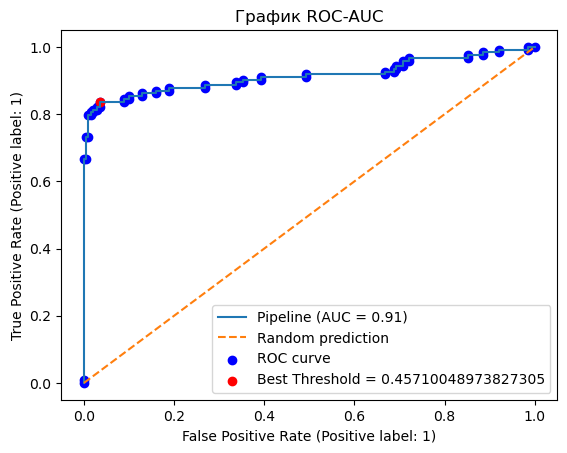

In [71]:

# Получите вероятности предсказаний
preds = grid_search.predict_proba(X_test)[:, 1]

# Вычислите значения FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, preds)

# Найдите порог, соответствующий лучшей производительности ROC-AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]

print('Best Threshold =', best_threshold)

RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='dashed', label='Random prediction')
plt.scatter(fpr, tpr, marker='o', label='ROC curve', color='b')
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='r', label=f'Best Threshold = {best_threshold}')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

In [72]:
prec = precision_score(y_test, y_pred)
prec

0.9705882352941176

In [73]:
recall = recall_score(y_test, y_pred)
recall

0.8048780487804879

In [74]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'], dtype='object')),
                                                 ('num', RobustScaler(),
                                                  Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц',
       'выручка_текущ_месяц', 'время_пред_месяц', 'время_текущ_месяц'],
      dtype='object'))])),
                ('models', SVC(C=1, probability=True, random_state=42))])

In [75]:
grid_search.best_params_

{'models': SVC(C=1, probability=True, random_state=42),
 'models__C': 1,
 'models__kernel': 'rbf',
 'preprocessor__num': RobustScaler()}

In [76]:
pd.Series(preds)

0      0.052639
1      0.955813
2      0.135942
3      0.982892
4      0.461583
         ...   
319    0.861713
320    0.087236
321    0.885856
322    0.264804
323    0.982057
Length: 324, dtype: float64

In [77]:
preds_prob = [round(x) for x in preds * 100]

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>


На данном этапе был построен пайплайны обработки и обучения моделей МО. KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC() использовались в обучении. В результате поиска лучшей оценки по сетке GridSearch, лучший результат показала модель классификатора основанного на методе опорных векторов SVC() c параметрами (SVC(C=0.1, probability=True, random_state=42, kernel'=  'rbf').

Оценка roc_auc_score показала результат = 0.91. Это означает, что ваша модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи. Чем ближе значение ROC AUC к 1, тем лучше качество модели. Высокий ROC AUC говорит о том, что модель демонстрирует хорошую способность к классификации, и это положительное явление.

 Метрика precision= 0.97, показывает что 97% всех прогнозов положительного класса, сделанных нашей моделью, являются верными (истинно положительными), и только 3% из них являются ложно положительными. Это хороший показатель для точности, и он указывает на то, что ваша модель склонна делать мало ошибок, предсказывая того что покупательская активность клиента снизится.

recall = 0.80, это означает, что ваша модель правильно классифицировала 80% всех действительно положительных случаев и допустила ошибку (ложно отрицательный прогноз) в 20% случаев.

In [78]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__metric,param_models__n_neighbors,param_preprocessor__num,param_models__max_depth,param_models__max_features,...,param_models__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1214,0.137556,0.005891,0.016886,0.001000,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,RobustScaler(),NaN,NaN,...,rbf,"{'models': SVC(C=1, probability=True, random_s...",0.910654,0.938778,0.908333,0.921509,0.877140,0.911283,0.020176,1
1197,0.187517,0.030089,0.020956,0.001474,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,StandardScaler(),NaN,NaN,...,rbf,"{'models': SVC(C=1, probability=True, random_s...",0.907081,0.932889,0.910023,0.915541,0.889865,0.911079,0.013876,2
1181,0.210847,0.003143,0.026528,0.000849,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,StandardScaler(),NaN,NaN,...,rbf,"{'models': SVC(C=1, probability=True, random_s...",0.905517,0.930778,0.909572,0.911824,0.887500,0.909038,0.013834,3
1213,0.140404,0.009736,0.016762,0.001070,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,StandardScaler(),NaN,NaN,...,rbf,"{'models': SVC(C=1, probability=True, random_s...",0.916462,0.917333,0.904505,0.910923,0.892455,0.908336,0.009171,4
1198,0.175796,0.009013,0.021818,0.002205,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,RobustScaler(),NaN,NaN,...,rbf,"{'models': SVC(C=1, probability=True, random_s...",0.881952,0.938667,0.910811,0.915428,0.864527,0.902277,0.026108,5


# Анализ важности признаков

In [79]:
best_model = grid_search.best_estimator_
svc_model =  best_model.named_steps['models']
X_train_new = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test_new = best_model.named_steps['preprocessor'].fit_transform(X_test)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [80]:
explainer = shap.Explainer(svc_model.predict_proba, X_train_new)
shap_values = explainer(X_test_new)

PermutationExplainer explainer:   8%|███▊                                             | 25/324 [00:47<11:18,  2.27s/it]


KeyboardInterrupt: 

In [ ]:
cat_cols = grid_search.best_estimator_.named_steps['preprocessor'].\
                            named_transformers_['ohe'].\
                            named_steps['ohe'].\
                            get_feature_names_out(ohe_columns)
# all_cols = np.concatenate(cat_cols, num_columns)
num_cols = np.array(num_columns)

all_cols = np.concatenate((cat_cols, num_cols))
all_cols = list(all_cols)
all_cols

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[:, :, 1], X_test_new, plot_type="dot",
                  feature_names=all_cols, show=True, plot_size=(15,9))

<span style="font-size: 16pt;">
    Интерпретация графика: 
</span>

<span style="font-size: 12pt;">
   Полученный график интерпретируется следующим образом:
    

- Значения слева от центральной вертикальной линии — это "Прежний уровень" (0), справа — "Снизилась" (1) по матрице ошибок предиктивной ML-модели;
    
- Толщина линии прямо пропорциональна количеству точек наблюдения;
    
- Чем краснее точки, тем большее значение имеет признак в этой точке.

    
    
    1) Более высокое значения акционных покупок приводит к тому, что покупательская активность клиента падает.
    2) Чем больше страниц клиент посещает за сеанс, тем вероятнее что его покупательская активность останется на прежнем уровне
    3) Чем больше проведенного времени в текущем и предыдущем месяце у клиента, тем вероятнее его покупательская активность останется на прежнем уровне.
    4) Чем больше просмотров , категорий за визит, тем вероятнее покупательская активность останется на прежнем уровне.
    5) Чем больше маркетинговой активность в пользу клиента тем вероятнее его покупательская активность останется на прежнем уровне
    6) Покупательская активность клиента будет снижаться, тем сильнее, чем больше в его корзине будет  неоплаченных товаров.
    
    Соответсвенно, можно описать портрет клиента покупательская активность, которого вероятнее всего будет снижаться - это клиент который посещает мало страниц за визит и тратит мало времени на покупки,также он имеет большое количество неоплаченных товарова в корзине, и как ни странно, совершает большое количество акционных покупок.
    
    
</span>

In [ ]:
shap.initjs()
plt.figure(figsize=(22,22))
shap.summary_plot(shap_values[:, :, 1], X_test_new, plot_type="bar",
                  feature_names=all_cols)

Признаки на графике расположены в порядке убывания их вклада: если убрать те, что наверху, качество модели просядет сильнее всего. Исходя из графика можно сказать, что следующие признаки малозначимы для модели: Популярная категория товаров, Тип сервиса, Выручка в текущем и предыдущем месяце и ошибка сервиса. Они оказывают малое влияние на целевой признак.


<span style="font-size: 14pt;">
    Вывод:
</span>

Учитывая данные анализа важности признаков и интерпретации работы модели МО, можно выдвинуть следующие  предложения для принятия бизнес-решений

Из вышеуказанных результатов интерпретации работы модели машинного обучения можно сделать несколько важных наблюдений и предложений для бизнес-решений:

1. **Управление акционными предложениями**: Если более высокое значение акционных покупок связано с снижением покупательской активности клиентов, то компания может пересмотреть свои стратегии акций. Можно сократить количество акций или изменить их устройство, чтобы более точно целиться в целевую аудиторию и избегать нежелательных последствий снижения активности.

2. **Оптимизация пользовательского опыта**: Увеличение количества просматриваемых страниц и проведенного времени на сайте влияют на уровень покупательской активности. Поэтому можно уделить внимание улучшению пользовательского интерфейса, увеличению релевантности контента, и созданию более привлекательных сценариев взаимодействия с сайтом, чтобы удержать клиентов на сайте и стимулировать их к покупкам.

3. **Сегментация клиентов**: На основе предоставленных данных можно разделить клиентов на различные сегменты в зависимости от их поведения и активности. Это позволит компании более точно настраивать маркетинговые кампании, предлагать персонализированные предложения и обслуживание, а также оптимизировать затраты.

4. **Улучшение маркетинговых усилий**: Понимание того, что более высокая маркетинговая активность положительно влияет на покупательскую активность клиентов, может способствовать увеличению инвестиций в маркетинг и продвижение. Это может включать в себя увеличение бюджета на рекламу, расширение программ лояльности, и другие маркетинговые мероприятия.

5. **Управление корзиной**: Если неоплаченные товары в корзине клиента связаны с снижением покупательской активности, то компания может предпринять шаги для предотвращения оставления товаров в корзине. Это может включать в себя напоминания клиентам о неоплаченных позициях, предоставление скидок или предложений для завершения покупки.

6. **Мониторинг и анализ**: Критически важно создать систему мониторинга и анализа, чтобы регулярно отслеживать эти параметры и адаптировать стратегии в реальном времени. Это поможет компании быстро реагировать на изменения в поведении клиентов и улучшать результаты.

**Общий вывод**: Используя результаты анализа модели машинного обучения, компания может оптимизировать свои стратегии продаж, маркетинга и обслуживания клиентов, чтобы максимизировать покупательскую активность и улучшить свои бизнес-результаты.

# Сегментация покупателей

In [ ]:
full_df = full_df.join(money_df, on='id')

Исходя из анализа результатов работы модели МО выделим следующие сегменты покупателей:

1) Сегментация пользователей по активности проведенной на сайте(время на сайте, минут в сеанс, число страниц за визит) 

2) Сегментация пользователей по активности работы с ним (марктениговая активность, тип сервиса, разрешение на сообщение)

3) Сегментация по продуктовому поведению(наиболее частая категория покупаемых товаров, число просмотров категорий за визит, число неоплаченных товаров в корзине)

4) Сегментация по финансовому поведению(прибыль приносимая клиентом, разница выручки между месяцами)

Проведем анализ сегмента по покупательской активности сегмента по пользовательской активности


In [ ]:
full_df.insert(loc=1, column='Покупательская активность', value=target)

In [ ]:
full_df['Покупательская активность'] = full_df['Покупательская активность'].map({1:'Снизилась',
                                          0:'Прежний уровень'})

In [ ]:
pivot_table = full_df.pivot_table(index=['Покупательская активность'],
                          values=['Страниц_за_визит', 'Средний_просмотр_категорий_за_визит',
                                  'время_пред_месяц', 'время_текущ_месяц'],
                          aggfunc={'Страниц_за_визит': np.mean, 
                                   'Средний_просмотр_категорий_за_визит': np.mean,
                                   'время_пред_месяц': np.mean,
                                   'время_текущ_месяц': np.mean})

pivot_table

`Проведем сегментацию пользователей, используя результаты моделирования (вероятности снижения покупательской активности) и данные о среднемесячной прибыльности покупателя за последний 3 месяца. 

Добавим в тестовую выборку данные предсказаний вероятности классов предсказанных моделью 

In [ ]:
X_test.head()

In [ ]:
preds = [round(x) for x in preds * 100]
X_test.insert(loc=0, column='Вероятность снижения пок-ой актив-ти', value=preds)
X_test = X_test.join(money_df, on='id')
X_test.head()

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=X_test, x='Прибыль', y='Вероятность снижения пок-ой актив-ти')

font_properties = {'family': 'serif', 'color': 'blue', 'size': 11}

plt.axhline(y=62, color='green', linestyle='--', label='Граница разделения Вероятности снижения пок-ой акт-ти')
plt.text(570, 62 + 0.8, 'Граница разделения Вероятности снижения пок-ой акт-ти', color='black', fontdict=font_properties)

plt.axvline(x=full_df['Прибыль'].mean(), linestyle='-.', color='yellow',label='Граница разделения Прибыли, руб')
plt.text(full_df['Прибыль'].mean(), 32.2, 'Граница разделения Прибыли, руб', rotation=90, color='black', 
        verticalalignment='center',
        fontdict=font_properties)

plt.title('Скаттерплот');


Выберем границы разделения для вероятности снижения активности на уровне 62%, так как из графика видно, что явно выделяются два подкласса клиентов для которых веростность снижения покупательской активности высокая(верхняя часть графика) и для которых вероятность снижения низкая(нижняя часть графика), таким образом мы сможем понять какую стратегию принять для того, чтобы удержать клиентов, кто потенциально снизит покупательскую активность, и какую стратегию стоит принять чтобы поддерживать покупательскую активность для тех клиентов, чья вероятность низкая

In [ ]:
mean_income = X_test['Прибыль'].mean()

def categorize_probablity(row):
    prob = row['Вероятность снижения пок-ой актив-ти']
    
    if prob <= 62:
        return 'Низкая вер-ть снижения акти-ти'
    if prob > 62:
        return 'Высокая вероятность снижения акти-ти'
    
X_test['Кат. Вероятность снижения'] = X_test.apply(categorize_probablity, axis=1)

def categorize_income(row):
    income = row['Прибыль']
    
    if income <= mean_income:
        return 'Прибыль ниже среднего'
    
    if income > mean_income:
        return 'Прибыль выше среднего'
    
X_test['Категория прибыли'] = X_test.apply(categorize_income, axis=1)



In [ ]:
X_test['Суммарное время на сайте'] = X_test['время_пред_месяц'] + X_test['время_текущ_месяц']

In [ ]:
pd.set_option('display.max_columns', None) 
X_test.head()

In [ ]:
pvt_table = X_test.pivot_table(index=['Кат. Вероятность снижения','Категория прибыли'],
                               values=['Маркет_актив_6_мес','Маркет_актив_тек_мес','Длительность','Акционные_покупки',
                                       'Средний_просмотр_категорий_за_визит', 'Страниц_за_визит',
                                       'Суммарное время на сайте','Неоплаченные_продукты_штук_квартал',
                                       'Прибыль'],
                               aggfunc=np.mean)
pvt_table

In [ ]:
pvt_table[['Акционные_покупки']].plot(kind='bar', color='skyblue', edgecolor='black')

for i, value in enumerate(pvt_table['Акционные_покупки']):
    plt.text(i, value, f'{value:.2%}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Категория', fontsize=14)
plt.ylabel('Среднее значение', fontsize=14)
plt.title('Средняя доля акционных покупок', fontsize=16)

plt.gcf().set_size_inches(10, 6)

plt.show()

In [ ]:
pvt_table[['Маркет_актив_6_мес', 'Маркет_актив_тек_мес']].plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Среднее значение')
plt.title('Сравнение Маркет_актив_6_мес и Маркет_актив_тек_мес по категориям')
plt.show()

In [ ]:
pvt_table[['Длительность']].plot(kind='bar', color='skyblue', edgecolor='black')

for i, value in enumerate(pvt_table['Длительность']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Категория', fontsize=14)
plt.ylabel('Среднее значение', fontsize=14)
plt.title('Средняя длительность регистрации на сайте', fontsize=16)

plt.gcf().set_size_inches(10, 6)

plt.show()

In [ ]:
pvt_table[['Средний_просмотр_категорий_за_визит','Страниц_за_визит', 'Суммарное время на сайте']].plot(kind='bar',  stacked=True)
plt.xlabel('Категория')
plt.ylabel('Среднее значение')
plt.title(' Сравнение активности на сайте по категориям по категориям')
plt.show()

In [ ]:
pvt_table2 = X_test.pivot_table(index=['Кат. Вероятность снижения','Категория прибыли'],
                                columns='Популярная_категория',
                                aggfunc={'Популярная_категория':'count'})
pvt_table2

In [ ]:
pvt_table3 = X_test.pivot_table(index=['Кат. Вероятность снижения','Категория прибыли'],
                                columns=['Тип сервиса'],
                                aggfunc={'Тип сервиса':'count'})
pvt_table3
pvt_3_df = pd.DataFrame(pvt_table3)
pvt_3_df
pvt_3_df['Доля премиум подписок'] = (pvt_3_df['Тип сервиса']['премиум']) / (pvt_3_df['Тип сервиса']['премиум'] + pvt_3_df['Тип сервиса']['стандарт'])
pvt_3_df

In [ ]:
pvt_3_df['Доля премиум подписок'].plot(kind='bar', color='royalblue', edgecolor='black')

for i, value in enumerate(pvt_3_df['Доля премиум подписок']):
    plt.text(i, value, f'{value:.2%}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Категория', fontsize=14)
plt.ylabel('Доля', fontsize=14)
plt.title('Доля премиум подписок по категории', fontsize=16)

plt.gcf().set_size_inches(10, 6)

plt.show()

In [ ]:
pvt_table4 = X_test.pivot_table(index=['Кат. Вероятность снижения','Категория прибыли'],
                                columns=['Разрешить сообщать'],
                                aggfunc={'Разрешить сообщать':'count'})
pvt_table4

Выберем сегмент покупателей с высокой вероятностью снижения активности и прибыль ниже среднего. Как можно заметить из графиков и сводной таблицы , как правило, это клиенты которые дольше зарегистрированы на сайте, имеют больший процент акционных покупок(в связи чем их активность могла упасть так как в свое время они купили большое количество товаров по акции и сейчас не нуждаются в новых), имеют меньшую активность на сайте и компания производила в их сторону меньше маркетинговых усилий.

Видится логичным предложить компании принять следующую политику относительно данного сегмента: за проявление лояльности (за то, что клиенты долго зарегистрированы на сайте), сформировать новую акционную программу с учетем тех товарова, которые клиент еще не покупал(например, бытовая техника). Таким образом, клиенту будет выгодно покупать те товары, которых у него нет и это принесет компании доп. прибыль и поможет удержать покупательскую активность.Возиожно, также внедрение программы - систему наград и скидок для постоянных клиентов, рассылка персонализированных предложений и акции.

Также виднеется явная тендеция к тому, у данного сегмента ниже активность на сайте(время, число страниц и т.д.), поэтому компании будет выгодной продумать новый функционал для пользователя на сайте. Это может быть внедрение чат-ботов, торговых ассистентов, которые будут помогать при выборе товаров, также, возможно, стоит обновить интерфейс, чтобы избавить эффекта "приелся вид" и т.д. Это поможет компании не только с сегментом с высокой вероятностью снижения, но и с другими, так как это привнесет новые вещи в сайт и клиенту будет интересно попробовать, увидеть что-то новое.

Также заметно, что для этого сегмента уделялось меньше маркетинговой активности в последние 6 месяцев, поэтому предлагается компании внедрить систему отслеживания маркетинговой активности для клиентов, которая будет подсказывать, что в среднем маркет. активность падает и этому клиенту стоит уделить внимание.Также рентебалеьным решением является , внедрение программы реферального маркетинга, т.е. поощрение клиентов привлекать новых пользователей на сайт, предлагая им бонусы или скидки за каждого приглашенного друга

Также стоит отметить, что компании стоит пересмотреть фунцкционал сервиса премиум так как он не приносит нужной пользы. Так для покупателей с высокой вероятностью снижения покупательской активности, наблюдаются большая доля премиальных подписок. Это может говорить о том, что клиенту не нравится функционал премиум подписки, поэтому его стоит пересмотреть.

# Общий вывод

В ходе работы необходимо было:
1) построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Для работы предостовлялось 4 датасета, market_file_df содержит в себе 1300 записей и 12 признаков пропусков данных. Датасет market_money_df содержит в себе 3900 записей и 2 признака. Датасет market_time_df содержит 2600 записей и 2 признака. Датасет money_df содержит 1300 записей и 2 признака.

В ходе **предобработки данных**, были обработаны датасеты. В них были обработаны неявные дубликаты в строковых столбцах, удалены выбросы и соответствующие индексы для других датасетов, также где это необходимо были преобразованы типы данных.

Для поиска лучшей моделт были построены пайплайны обработки и обучения моделей МО. KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC() использовались в обучении.

В результате поиска лучшей оценки по сетке GridSearch, **лучший результат показала модель классификатора основанного на методе опорных векторов SVC() c параметрами (SVC(C=0.1, probability=True, random_state=42, kernel'=  'rbf').**

Данная модель показала следующие оценки: 

Оценка roc_auc_score показала результат = 0.91. Это означает, что ваша модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи. Чем ближе значение ROC AUC к 1, тем лучше качество модели. Высокий ROC AUC говорит о том, что модель демонстрирует хорошую способность к классификации, и это положительное явление.

 Метрика precision= 0.97, показывает что 97% всех прогнозов положительного класса, сделанных нашей моделью, являются верными (истинно положительными), и только 3% из них являются ложно положительными. Это хороший показатель для точности, и он указывает на то, что ваша модель склонна делать мало ошибок, предсказывая того что покупательская активность клиента снизится.

recall = 0.80, это означает, что ваша модель правильно классифицировала 80% всех действительно положительных случаев и допустила ошибку (ложно отрицательный прогноз) в 20% случаев.

**Инетерпретация модели**    1) Более высокое значения акционных покупок приводит к тому, что покупательская активность клиента падает.
    2) Чем больше страниц клиент посещает за сеанс, тем вероятнее что его покупательская активность останется на прежнем уровне
    3) Чем больше проведенного времени в текущем и предыдущем месяце у клиента, тем вероятнее его покупательская активность останется на прежнем уровне.
    4) Чем больше просмотров , категорий за визит, тем вероятнее покупательская активность останется на прежнем уровне.
    5) Чем больше маркетинговой активность в пользу клиента тем вероятнее его покупательская активность останется на прежнем уровне
    6) Покупательская активность клиента будет снижаться, тем сильнее, чем больше в его корзине будет  неоплаченных товаров.
    
    Соответсвенно, можно описать портрет клиента покупательская активность, которого вероятнее всего будет снижаться - это клиент который посещает мало страниц за визит и тратит мало времени на покупки,также он имеет большое количество неоплаченных товарова в корзине, и как ни странно, совершает большое количество акционных покупок.
    
Учитывая данные анализа важности признаков и интерпретации работы модели МО, можно выдвинуть следующие  предложения для принятия бизнес-решений

Из вышеуказанных результатов интерпретации работы модели машинного обучения можно сделать несколько важных наблюдений и предложений для бизнес-решений:

1. **Управление акционными предложениями**: Необходимо подбирать акционные предложения учитывая прошлый опыт покупателя, чтобы он покупал, те товары которых у него еще нет.

2. **Оптимизация пользовательского опыта**: Компании необходимо внедрять новый функционал, который повысит активность клиента на сайте.

3. **Улучшение маркетинговых усилий**:  высокая маркетинговая активность положительно влияет на покупательскую активность клиентов, поэтому  увеличению инвестиций в маркетинг  позволит компании повысить число клиентова, чья покупательская активность повысится. Это может включать в себя увеличение бюджета на рекламу, расширение программ лояльности, и другие маркетинговые мероприятия.

5. **Управление корзиной**: Так как наличие неоплаченных товаров в корзине повышает вероятность снижения  покупательской активности, то компания может предпринять шаги для предотвращения оставления товаров в корзине. Это может включать в себя напоминания клиентам о неоплаченных позициях, предоставление скидок или предложений для завершения покупки.

Выберем сегмент покупателей с высокой вероятностью снижения активности и прибыль ниже среднего. Как можно заметить из графиков и сводной таблицы , как правило, это клиенты которые дольше зарегистрированы на сайте, имеют больший процент акционных покупок(в связи чем их активность могла упасть так как в свое время они купили большое количество товаров по акции и сейчас не нуждаются в новых), имеют меньшую активность на сайте и компания производила в их сторону меньше маркетинговых усилий.

Видится логичным предложить компании принять следующую политику относительно данного сегмента: за проявление лояльности (за то, что клиенты долго зарегистрированы на сайте), сформировать новую акционную программу с учетем тех товарова, которые клиент еще не покупал(например, бытовая техника). Таким образом, клиенту будет выгодно покупать те товары, которых у него нет и это принесет компании доп. прибыль и поможет удержать покупательскую активность.Возиожно, также внедрение программы - систему наград и скидок для постоянных клиентов, рассылка персонализированных предложений и акции.

Также виднеется явная тендеция к тому, у данного сегмента ниже активность на сайте(время, число страниц и т.д.), поэтому компании будет выгодной продумать новый функционал для пользователя на сайте. Это может быть внедрение чат-ботов, торговых ассистентов, которые будут помогать при выборе товаров, также, возможно, стоит обновить интерфейс, чтобы избавить эффекта "приелся вид" и т.д. Это поможет компании не только с сегментом с высокой вероятностью снижения, но и с другими, так как это привнесет новые вещи в сайт и клиенту будет интересно попробовать, увидеть что-то новое.

Также заметно, что для этого сегмента уделялось меньше маркетинговой активности в последние 6 месяцев, поэтому предлагается компании внедрить систему отслеживания маркетинговой активности для клиентов, которая будет подсказывать, что в среднем маркет. активность падает и этому клиенту стоит уделить внимание.Также рентебалеьным решением является , внедрение программы реферального маркетинга, т.е. поощрение клиентов привлекать новых пользователей на сайт, предлагая им бонусы или скидки за каждого приглашенного друга

Также стоит отметить, что компании стоит пересмотреть фунцкционал сервиса премиум так как он не приносит нужной пользы. Так для покупателей с высокой вероятностью снижения покупательской активности, наблюдаются большая доля премиальных подписок. Это может говорить о том, что клиенту не нравится функционал премиум подписки, поэтому его стоит пересмотреть.

In [ ]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Время выполнения всего файла: {execution_time} секунд")